In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Mar 17 17:20:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install scikit-learn

In [85]:
import torch
import numpy as np
import pandas as pd
from sklearn.datasets import make_friedman1

#Generate dataset

In [86]:
X, y = make_friedman1(n_samples=150000, n_features=10, noise=0.1)

# Convert to pandas DataFrame
columns = [f'Feature#{i+1}' for i in range(10)]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y


In [87]:
df.describe()

,Feature#1,Feature#2,Feature#3,Feature#4,Feature#5,Feature#6,Feature#7,Feature#8,Feature#9,Feature#10,Target
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.499320,0.500587,0.499618,0.500640,0.499620,0.501461,0.500200,0.499772,0.499821,0.500066,14.429180
std,0.288941,0.288227,0.289237,0.288246,0.289112,0.289039,0.287976,0.288583,0.289016,0.288320,4.869260
min,0.000002,0.000014,0.000017,0.000002,0.000004,0.000002,0.000007,0.000008,0.000013,0.000002,0.554394
25%,0.248147,0.251840,0.247937,0.251097,0.249416,0.251432,0.251134,0.249486,0.248994,0.251310,10.978484
50%,0.498819,0.500142,0.499373,0.500753,0.498533,0.502537,0.500309,0.500481,0.500004,0.499615,14.424630
75%,0.749807,0.750433,0.750853,0.750160,0.750855,0.752204,0.749429,0.749722,0.750045,0.748810,17.922534
max,0.999998,0.999993,0.999992,0.999992,0.999999,0.999984,0.999992,0.999998,0.999998,0.999995,29.287402


In [88]:
def normalize_dataset(ds):
    mins = ds.min()
    maxs = ds.max()

    df_norm = (ds-mins)/(maxs-mins)
    return df_norm.to_numpy()

X = normalize_dataset(pd.DataFrame(X))
y = normalize_dataset(pd.DataFrame(y))

#LR

In [89]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statistics import mean

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
class LinReg:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.lr_model = LinearRegression()
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self):
        self.lr_model.fit(self.X_train, self.y_train)
        print('Train score:', self.lr_model.score(self.X_train, self.y_train), 'Test score:', self.lr_model.score(self.X_test, self.y_test))
        return self.lr_model.score(self.X_train, self.y_train), self.lr_model.score(self.X_test, self.y_test)

    def predict_and_calculate_mse(self):
        self.test_predictions = self.lr_model.predict(self.X_test)
        self.test_mse = mean_squared_error(self.y_test, self.test_predictions)
        print(f"Baseline Test MSE: {self.test_mse}")

        lin_reg_df = pd.DataFrame(self.X_test, columns=columns)
        lin_reg_df['Target'] = self.y_test
        lin_reg_df['Prediction'] = self.test_predictions


    def plot_learning_curves(self):
        train_sizes = [1000, 10000, 20000, 50000, 84000]
        train_sizes, train_scores, test_scores = learning_curve(self.lr_model,
                                                                self.X_train,
                                                                self.y_train,
                                                                train_sizes=train_sizes,
                                                                cv=5,
                                                                scoring='neg_mean_squared_error',
                                                                shuffle=True)
        train_scores_mean = -np.mean(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_scores_mean, label='Train')
        plt.plot(train_sizes, test_scores_mean, label='Test')
        plt.xlabel('Training Set Size')
        plt.ylabel('Mean Squared Error')
        plt.title('Learning Curves')
        plt.legend()
        plt.grid(True)
        plt.show()

        return mean(train_scores_mean), mean(test_scores_mean)




Train score: 0.7484509991226067 Test score: 0.7563025247237902
Baseline Test MSE: 0.006966630078492797


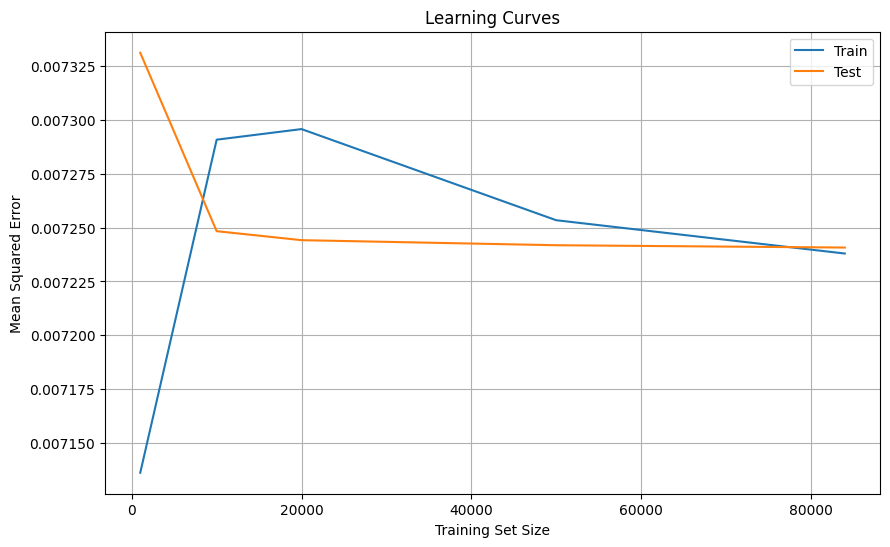

In [92]:
linear_regression = LinReg(X_train, X_test, y_train, y_test)
lr_r2_train_score, lr_r2_test_score = linear_regression.train_model()
linear_regression.predict_and_calculate_mse()
lr_train_mean_mse, lr_test_mean_mse = linear_regression.plot_learning_curves()

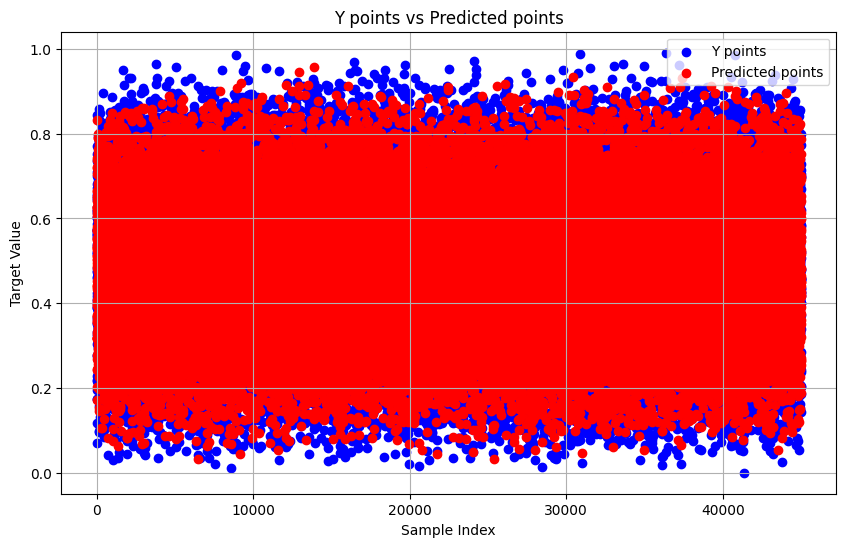

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(linear_regression.y_test)), linear_regression.y_test, color='blue', label='Y points')
plt.scatter(range(len(linear_regression.y_test)), linear_regression.test_predictions, color='red', label='Predicted points')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Y points vs Predicted points')
plt.legend()
plt.grid(True)
plt.show()

#DNN

In [94]:
from torch import nn
from torch.utils.data import DataLoader
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import torchmetrics

In [95]:
device = 'cuda'
X_train_torch = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_torch = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).to(device)

In [103]:
class DNN(nn.Module):
    def __init__(self, input_size, output_size, num_layers):
        super(DNN, self).__init__()
        layers = [nn.Linear(input_size, input_size, bias=True), nn.BatchNorm1d(10), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers.extend([nn.Linear(input_size, input_size, bias=True), nn.BatchNorm1d(10), nn.ReLU()])
        layers.append(nn.Linear(input_size, output_size, bias=True))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


In [106]:
def train_model(X_train, y_train, X_test, y_test, optimizer, learning_rate, num_layers, epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device:", device)
    input_size = X_train.size(1)
    output_size = 1  # Regression task

    # Define model
    model = DNN(input_size, output_size, num_layers).to(device)
    print(model)
    criterion = nn.MSELoss()
    if optimizer == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer == 'RMSProp':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unknown optimizer")

    # Initialize MeanAbsolutePercentageError metric
    # mape_metric = torchmetrics.MeanAbsolutePercentageError().to(device)

    # Training loop
    train_losses = []
    test_losses = []
    r2_train_list = []
    r2_test_list = []
    mape_train_list = []
    mape_test_list = []

    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512)
    test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512)

    for epoch in range(1, epochs + 1):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

            # Compute R2, MAPE, and MSE for train and test sets
            train_outputs = model(X_train).detach()
            test_outputs = model(X_test).detach()
            mse_train = mean_squared_error(y_train.cpu().numpy(), train_outputs.cpu().numpy())
            mse_test = mean_squared_error(y_test.cpu().numpy(), test_outputs.cpu().numpy())
            r2_train = r2_score(y_train.cpu().numpy(), train_outputs.cpu().numpy())
            r2_test = r2_score(y_test.cpu().numpy(), test_outputs.cpu().numpy())
            mape_train = mean_absolute_percentage_error(y_train.cpu().numpy(), train_outputs.cpu().numpy())
            mape_test = mean_absolute_percentage_error(y_test.cpu().numpy(), test_outputs.cpu().numpy())

            # Append values to lists for every epoch
            r2_train_list.append(r2_train)
            r2_test_list.append(r2_test)
            mape_train_list.append(mape_train)
            mape_test_list.append(mape_test)

        test_losses.append(test_loss / len(test_loader))

        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

    return model, train_losses, test_losses, r2_train_list, r2_test_list, mape_train_list, mape_test_list


DNN 1 hidden layers, SGD, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0042, Test Loss: 0.0039
Epoch [20/20], Train Loss: 0.0035, Test Loss: 0.0032


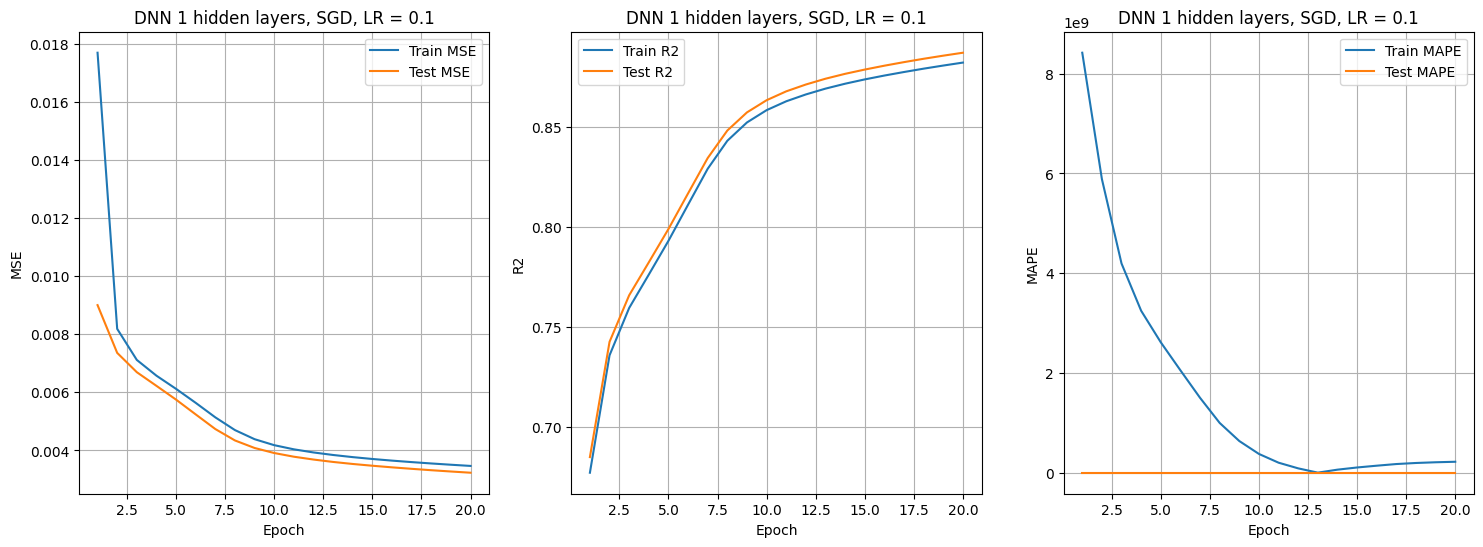

DNN 1 hidden layers, SGD, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0118, Test Loss: 0.0114
Epoch [20/20], Train Loss: 0.0099, Test Loss: 0.0096


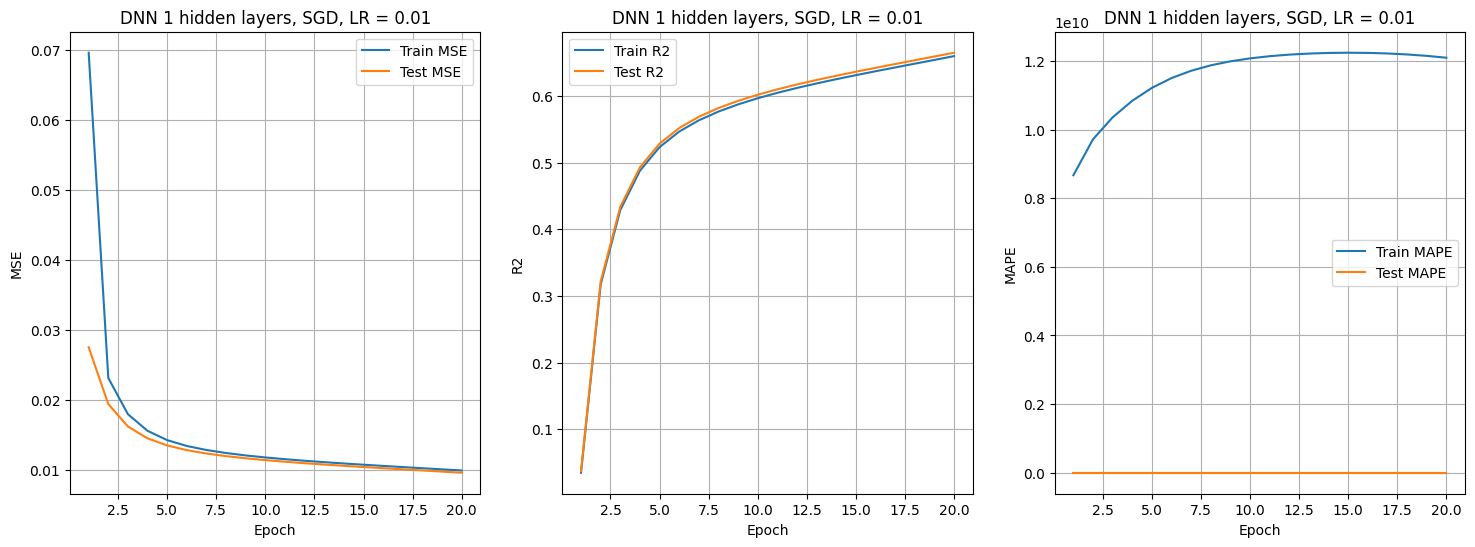

DNN 1 hidden layers, SGD, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0378, Test Loss: 0.0359
Epoch [20/20], Train Loss: 0.0223, Test Loss: 0.0217


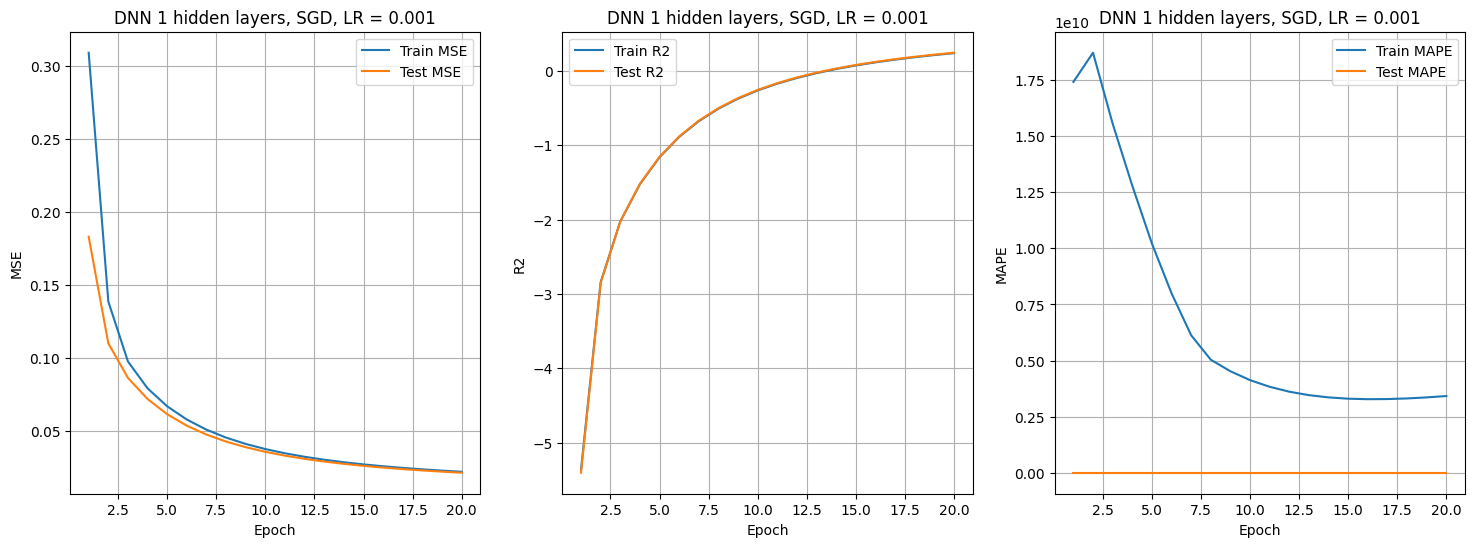

DNN 1 hidden layers, RMSProp, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0313, Test Loss: 0.0295
Epoch [20/20], Train Loss: 0.0313, Test Loss: 0.0295


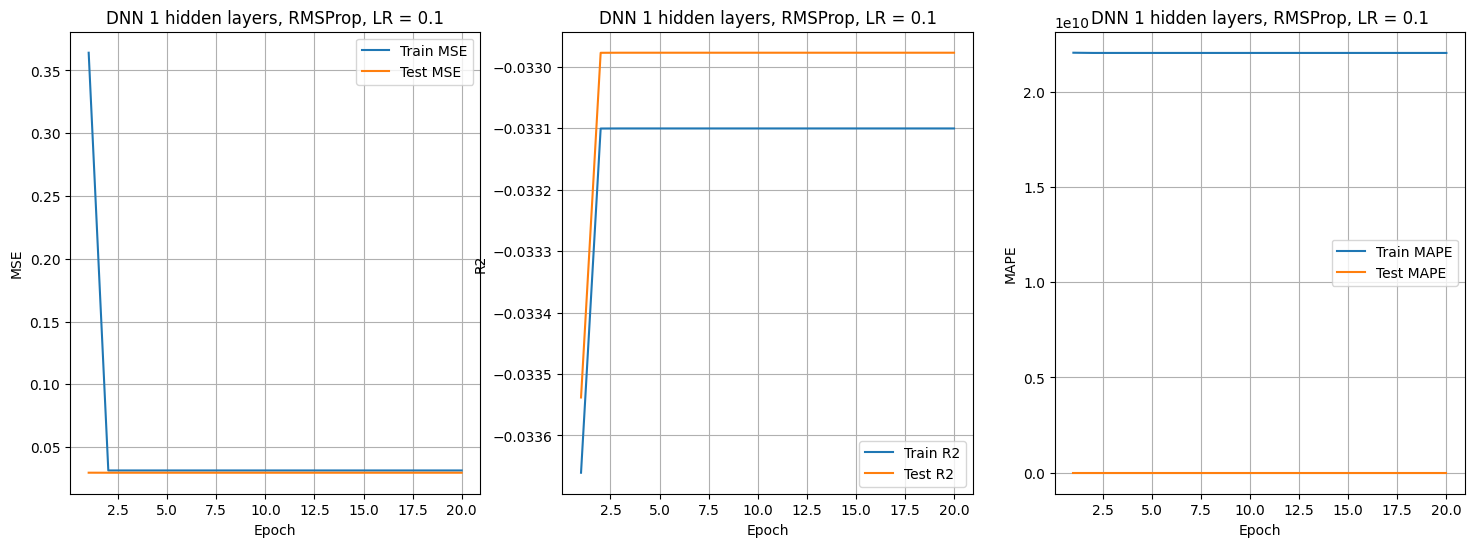

DNN 1 hidden layers, RMSProp, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0008, Test Loss: 0.0038
Epoch [20/20], Train Loss: 0.0007, Test Loss: 0.0018


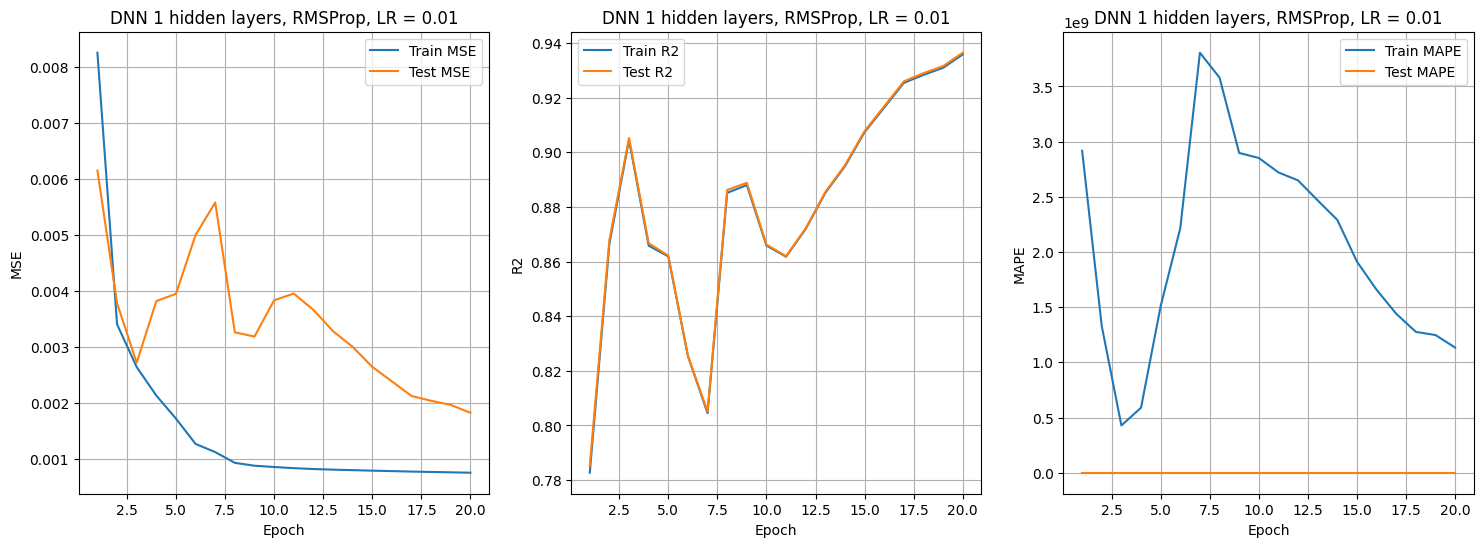

DNN 1 hidden layers, RMSProp, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0022, Test Loss: 0.0023
Epoch [20/20], Train Loss: 0.0007, Test Loss: 0.0014


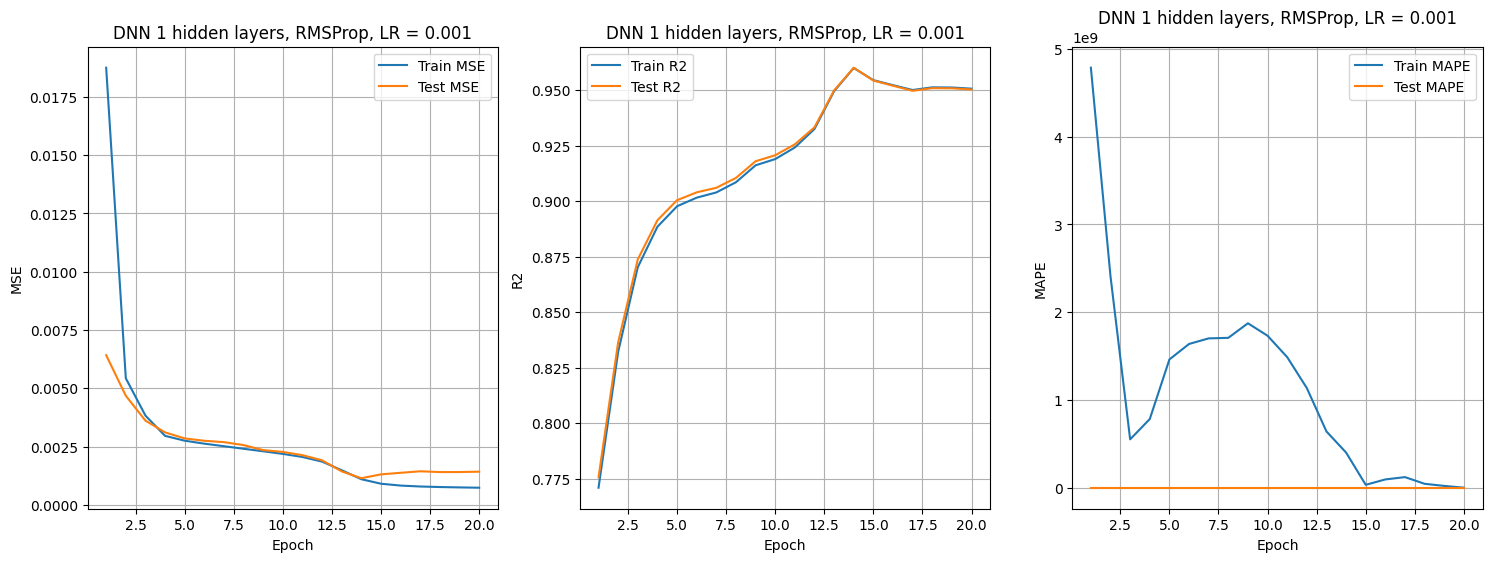

DNN 1 hidden layers, Adam, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0017, Test Loss: 0.0024
Epoch [20/20], Train Loss: 0.0017, Test Loss: 0.0026


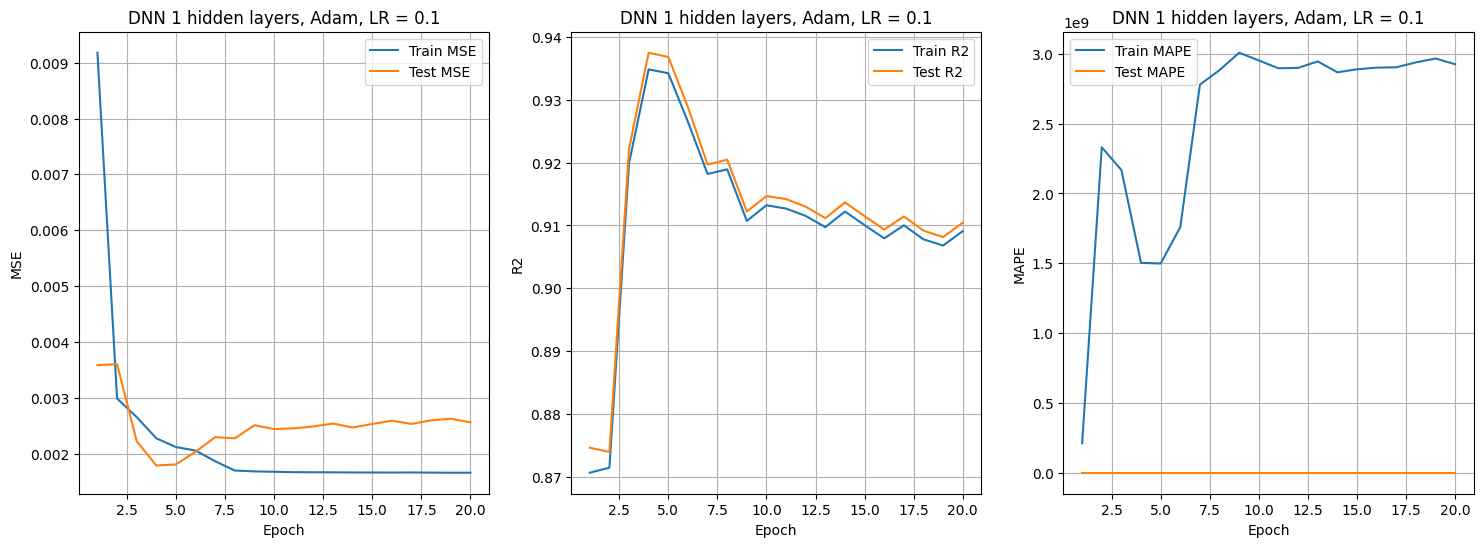

DNN 1 hidden layers, Adam, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0006, Test Loss: 0.0005
Epoch [20/20], Train Loss: 0.0006, Test Loss: 0.0005


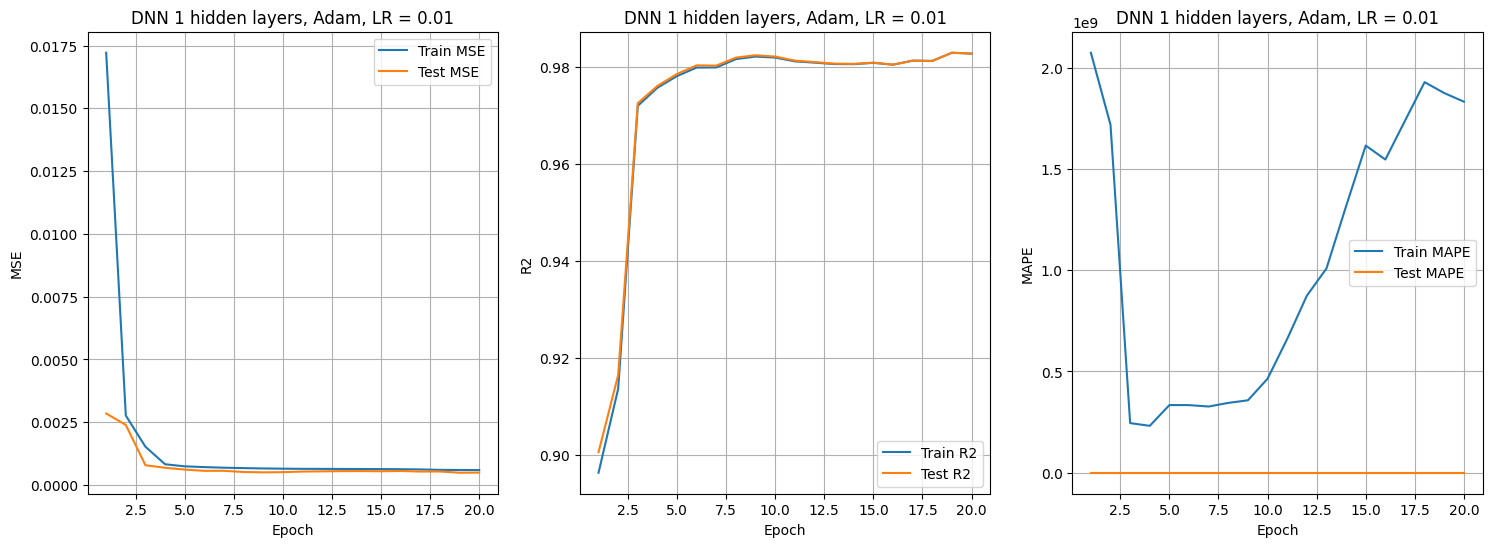

DNN 1 hidden layers, Adam, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0.0033, Test Loss: 0.0030
Epoch [20/20], Train Loss: 0.0017, Test Loss: 0.0015


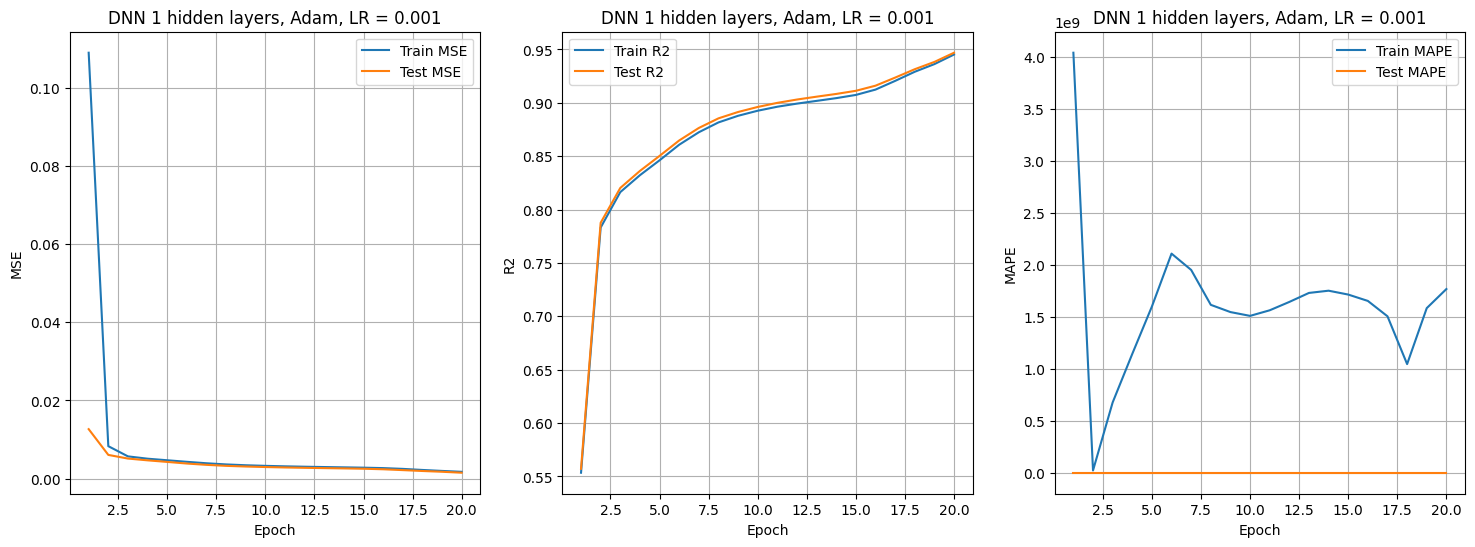

DNN 5 hidden layers, SGD, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 0

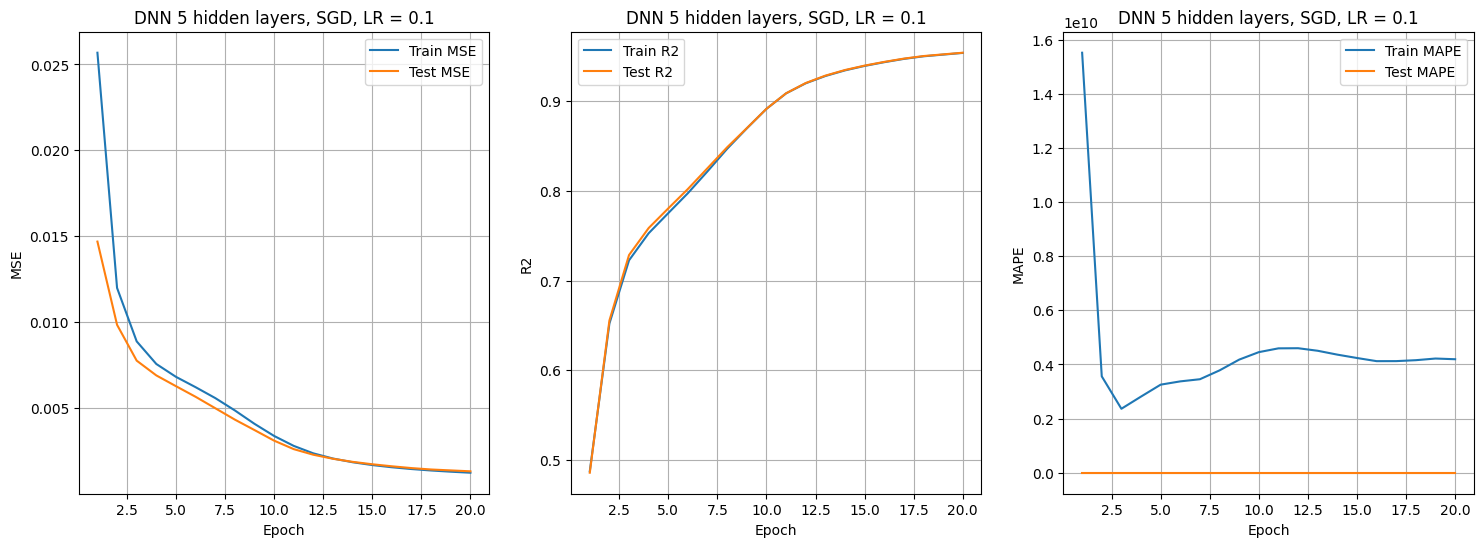

DNN 5 hidden layers, SGD, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 

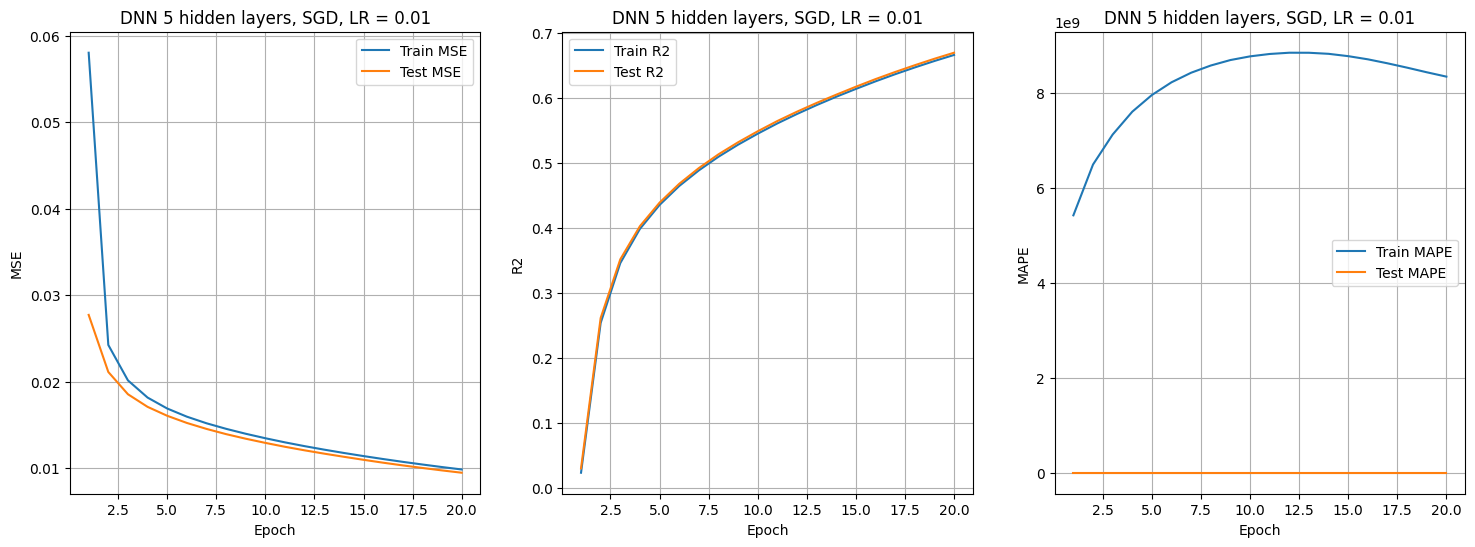

DNN 5 hidden layers, SGD, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss:

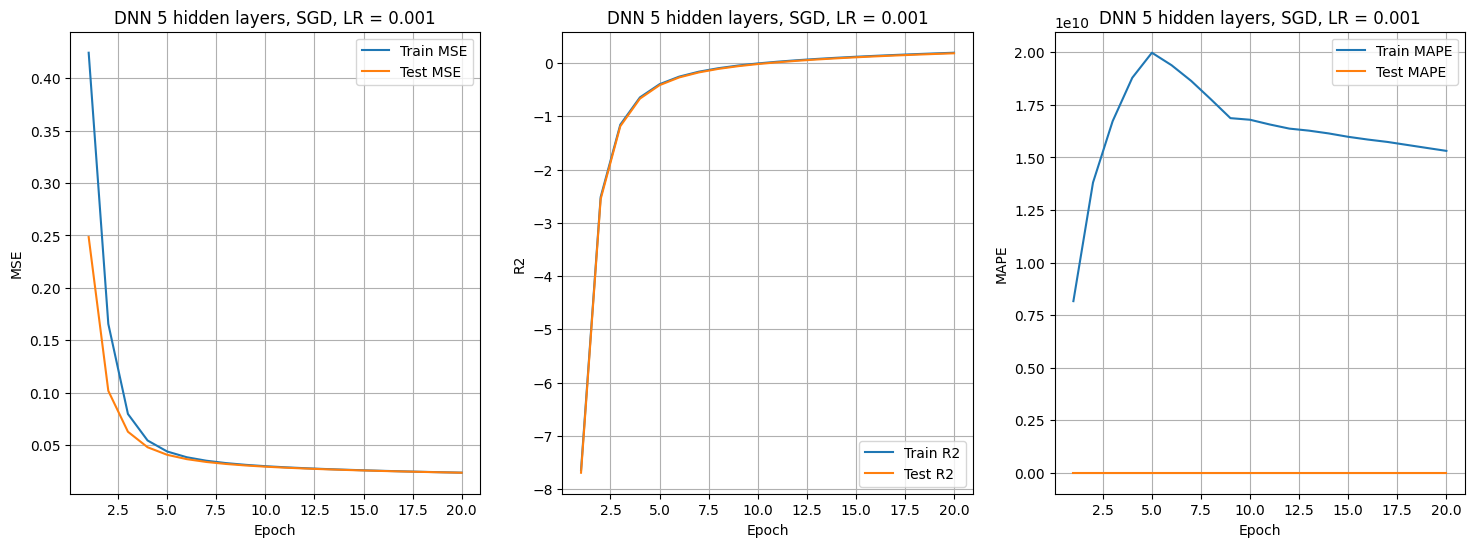

DNN 5 hidden layers, RMSProp, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Los

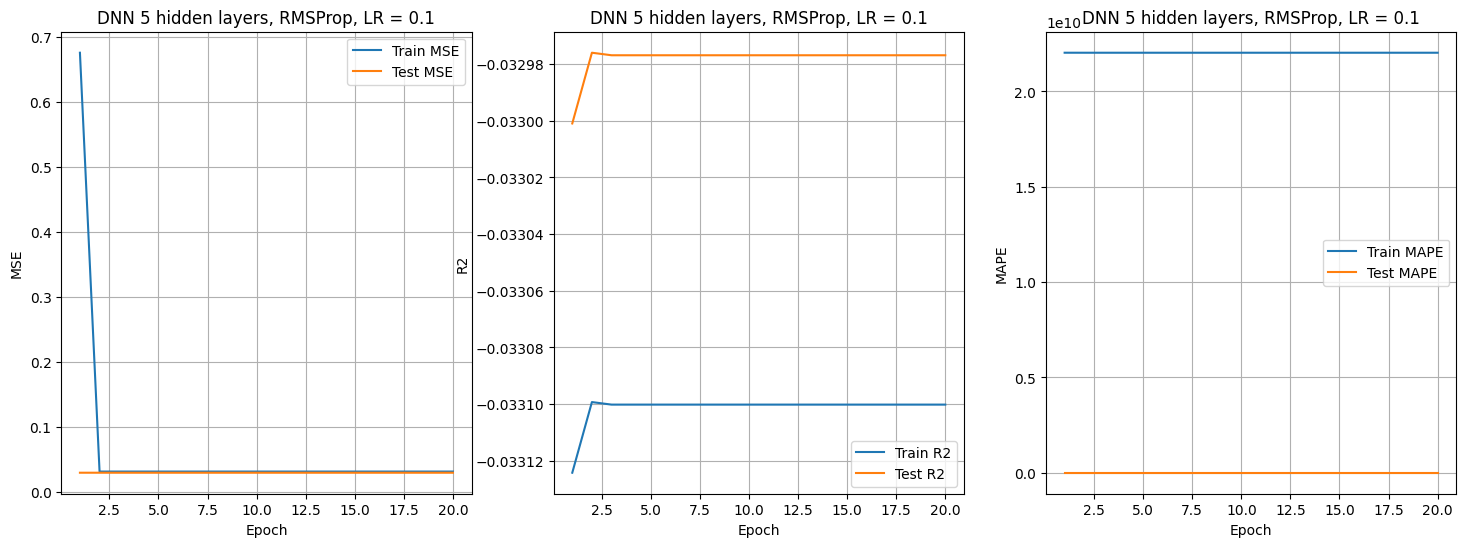

DNN 5 hidden layers, RMSProp, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Lo

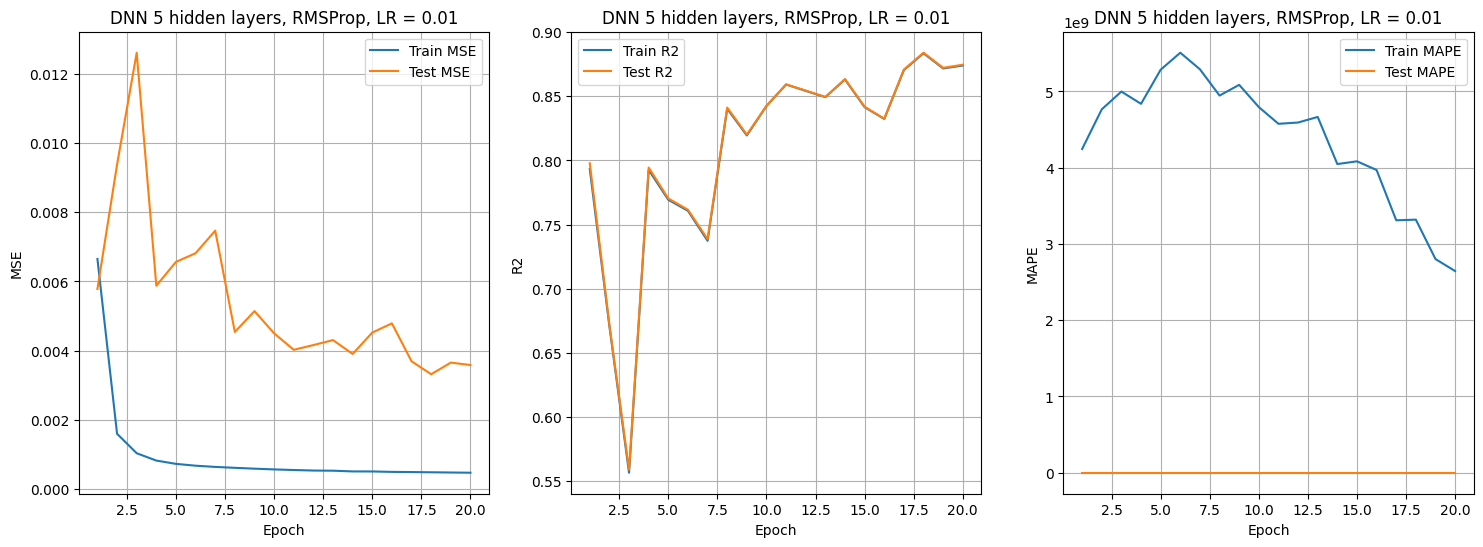

DNN 5 hidden layers, RMSProp, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train L

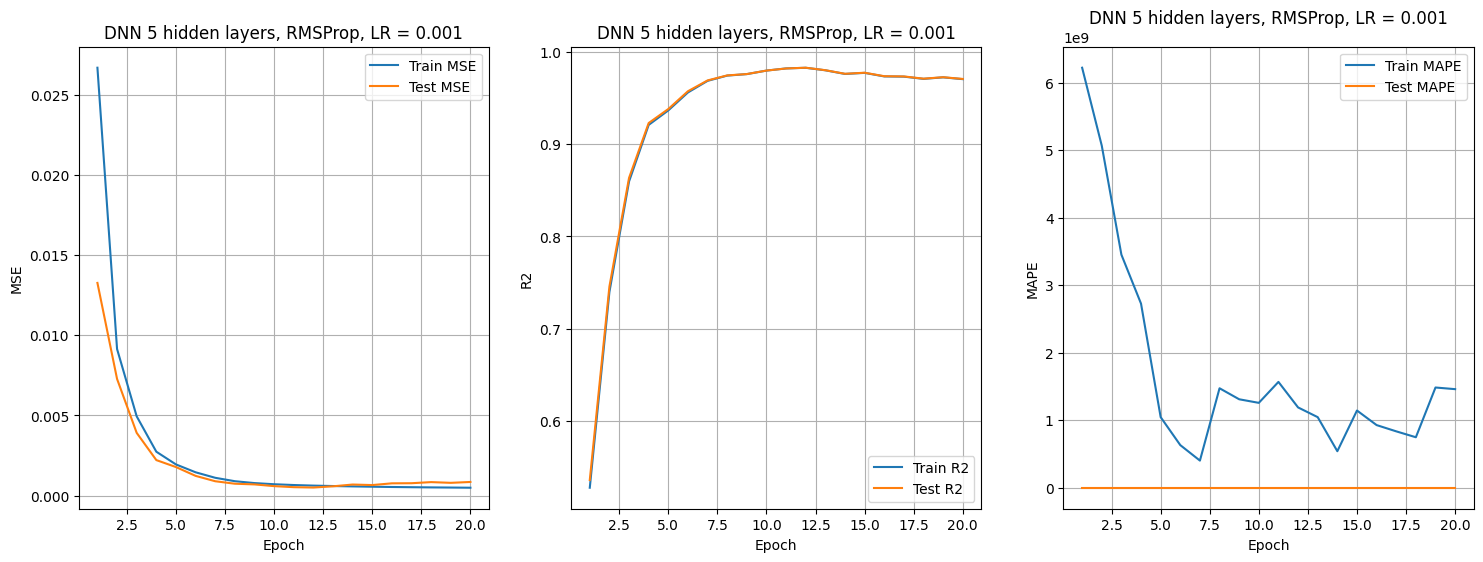

DNN 5 hidden layers, Adam, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss: 

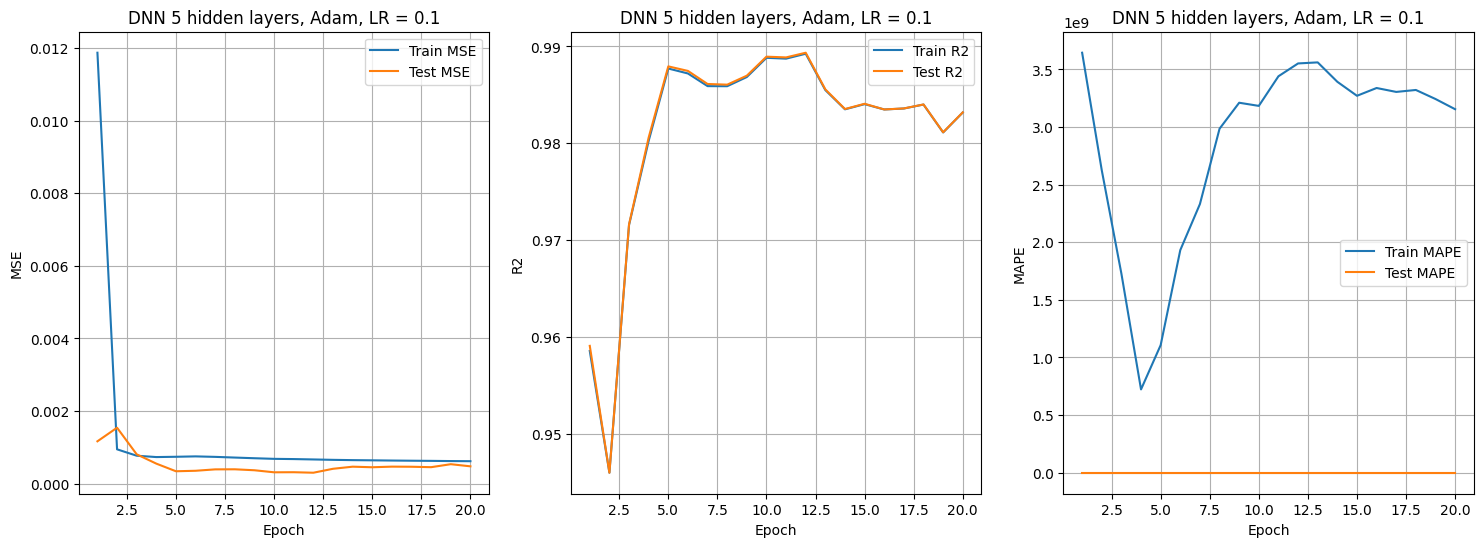

DNN 5 hidden layers, Adam, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss:

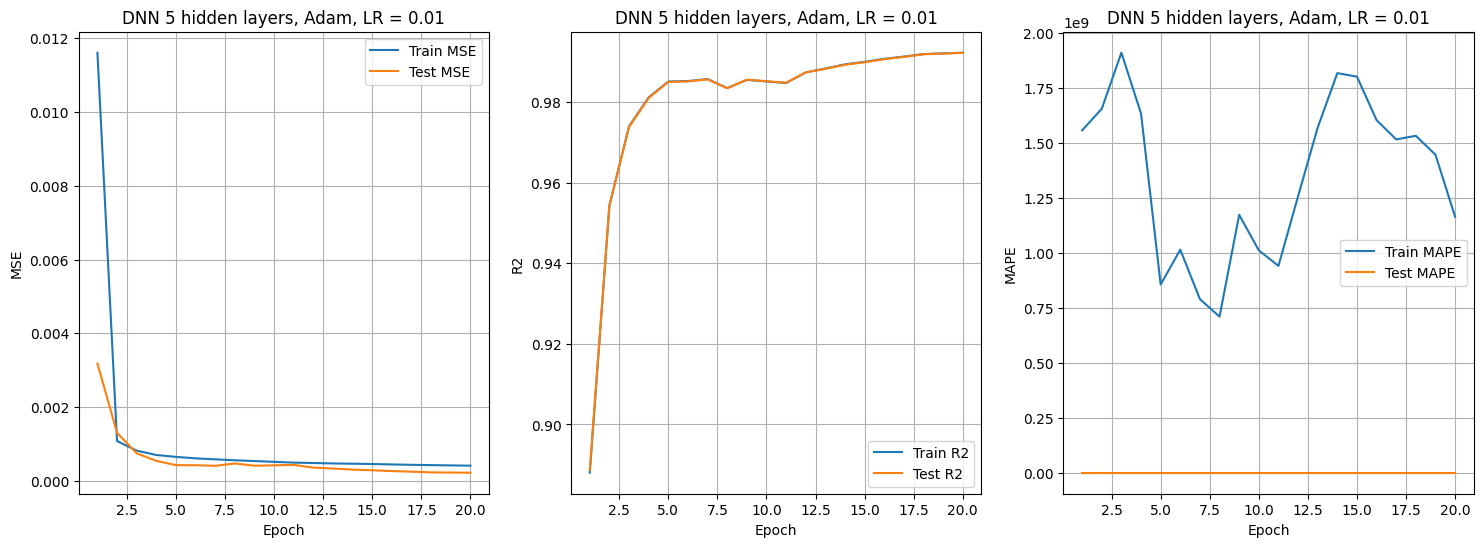

DNN 5 hidden layers, Adam, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=1, bias=True)
  )
)
Epoch [10/20], Train Loss

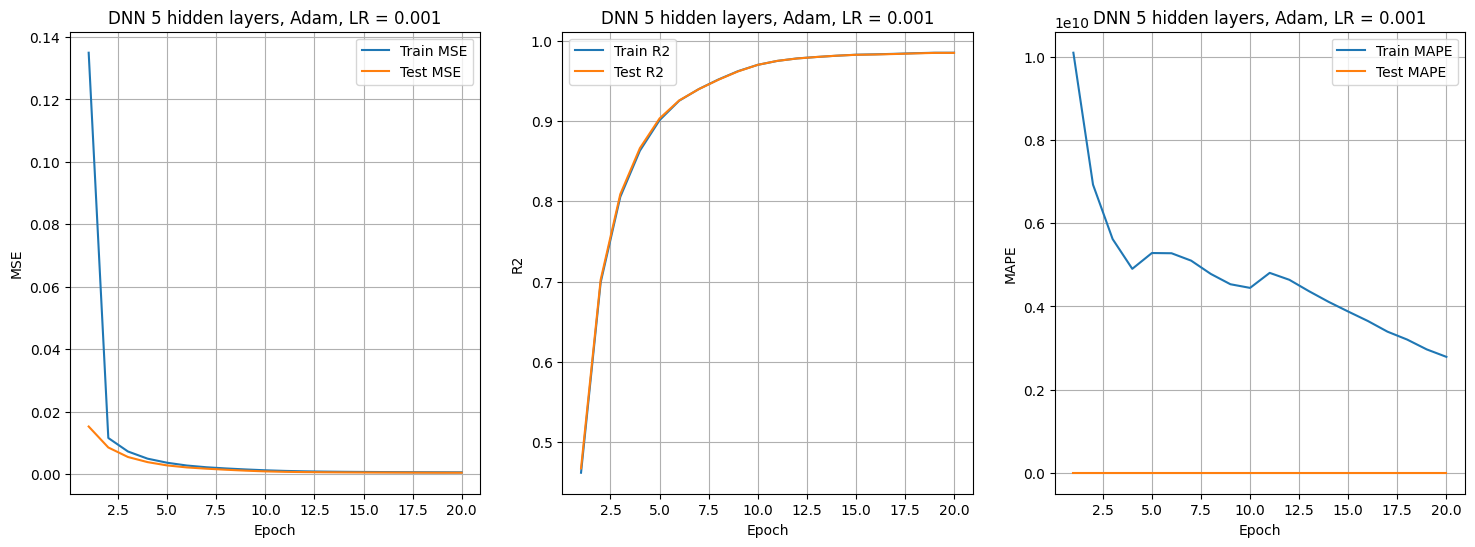

DNN 25 hidden layers, SGD, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, eps=1e

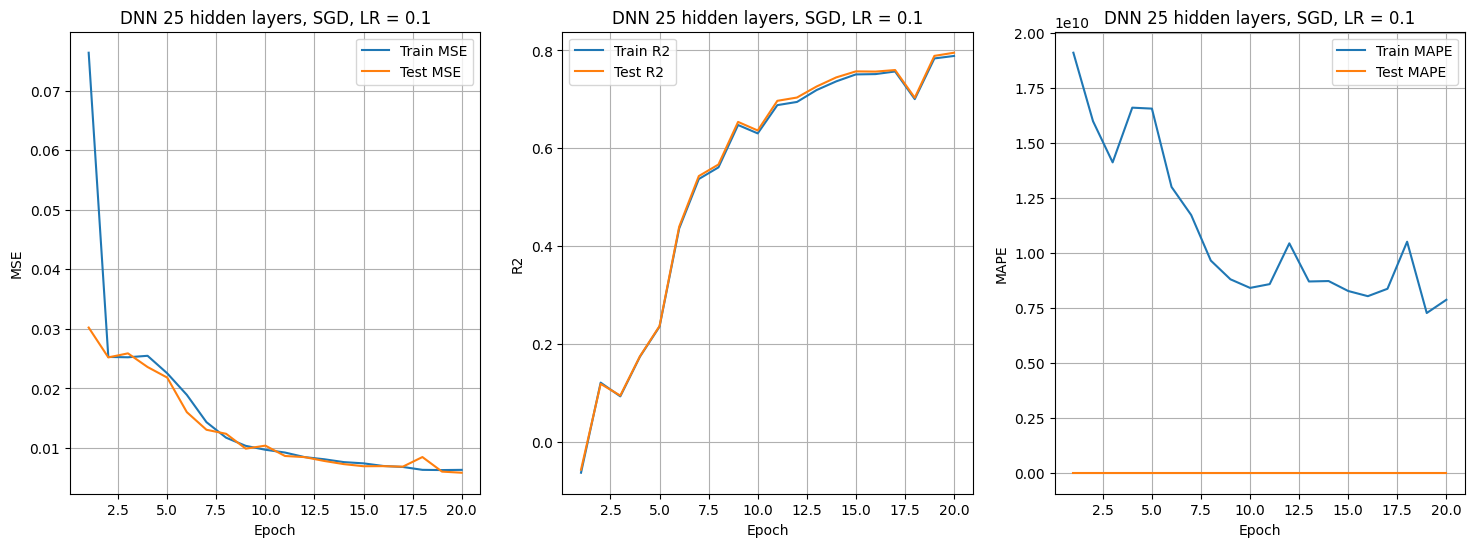

DNN 25 hidden layers, SGD, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, eps=1

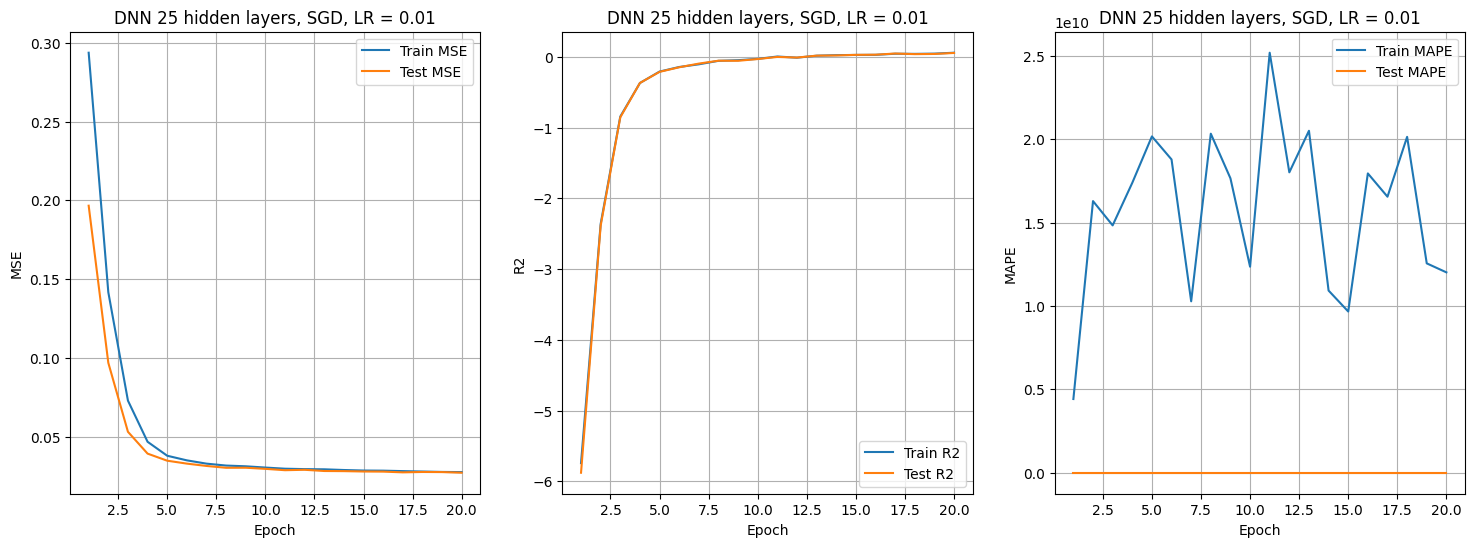

DNN 25 hidden layers, SGD, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, eps=

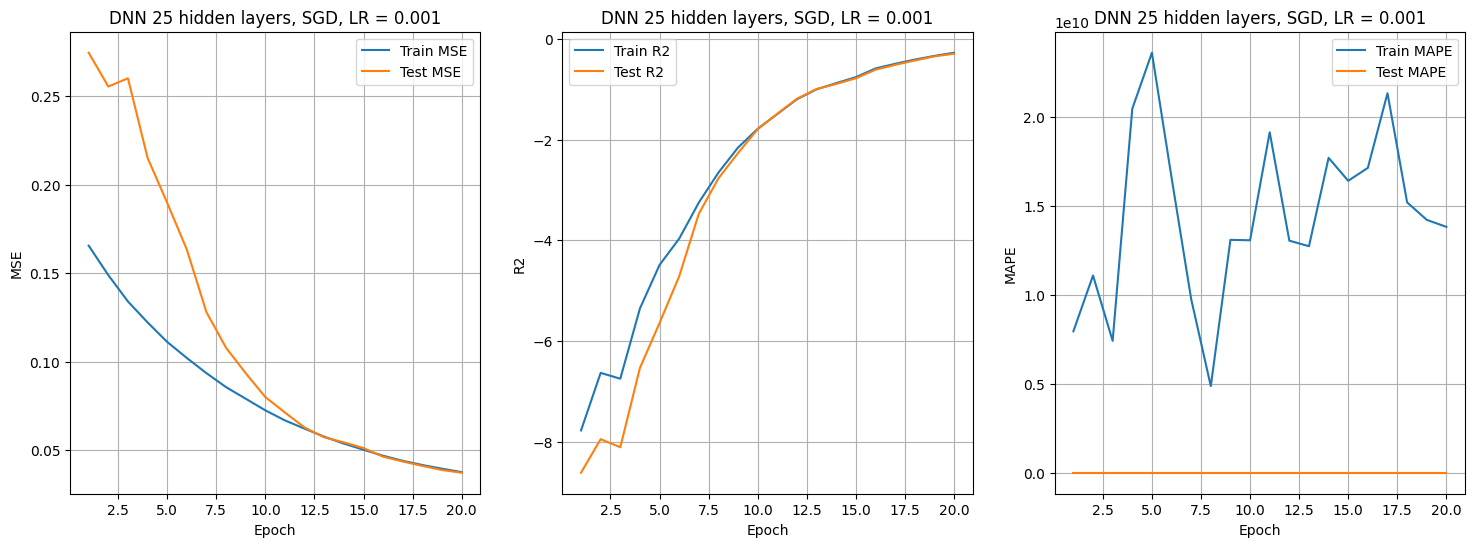

DNN 25 hidden layers, RMSProp, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, ep

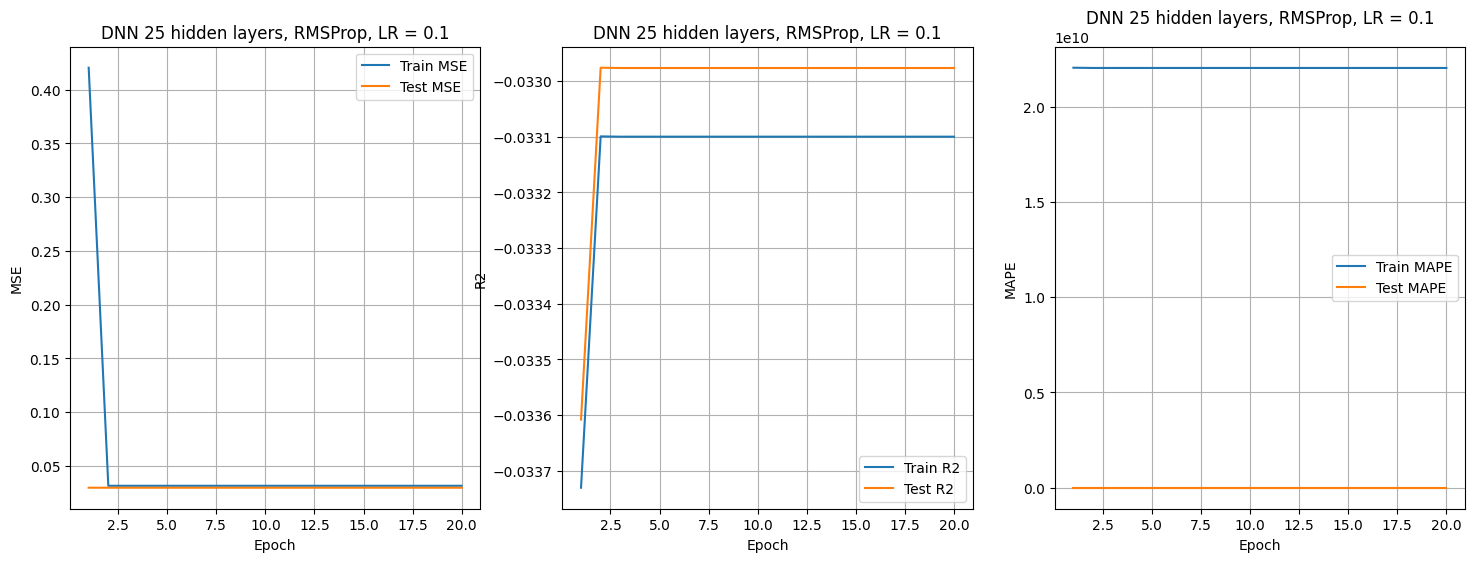

DNN 25 hidden layers, RMSProp, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, e

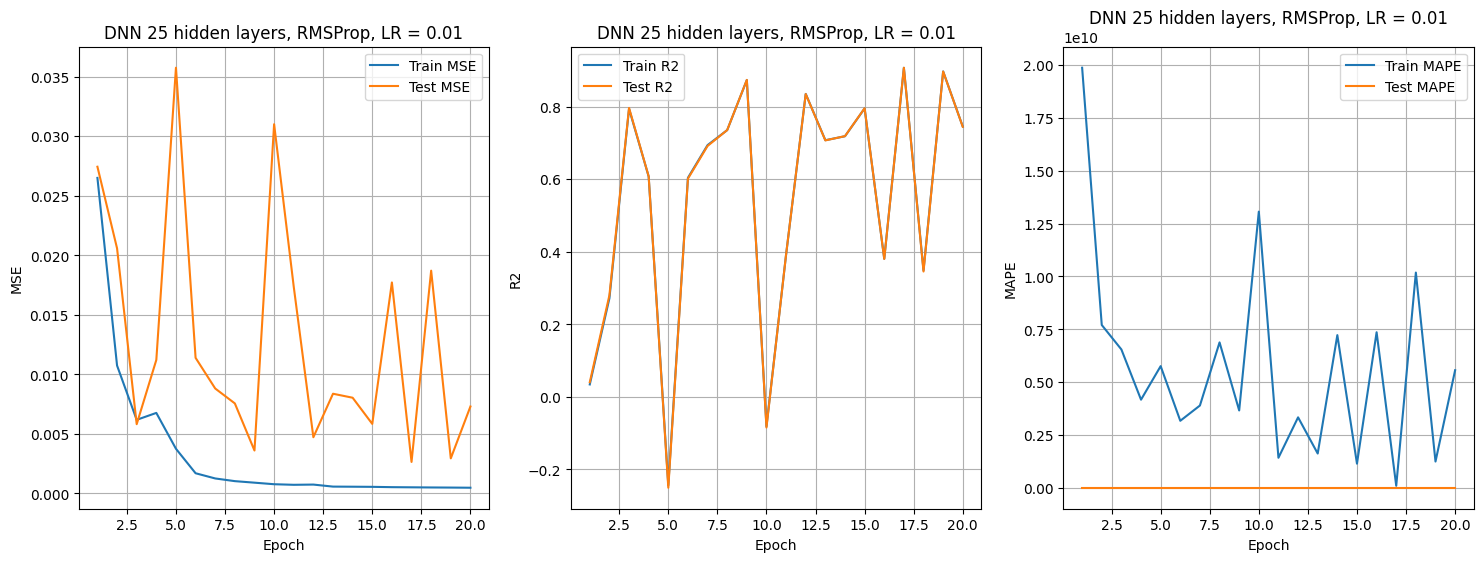

DNN 25 hidden layers, RMSProp, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, 

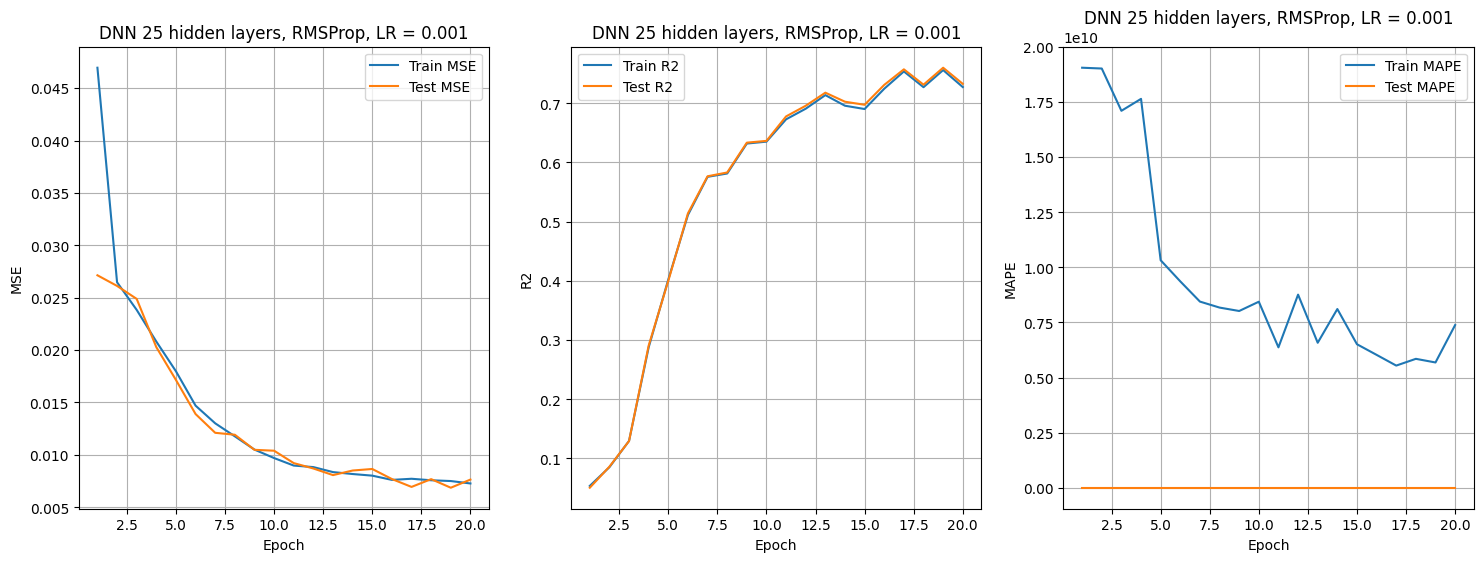

DNN 25 hidden layers, Adam, LR = 0.1
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, eps=1

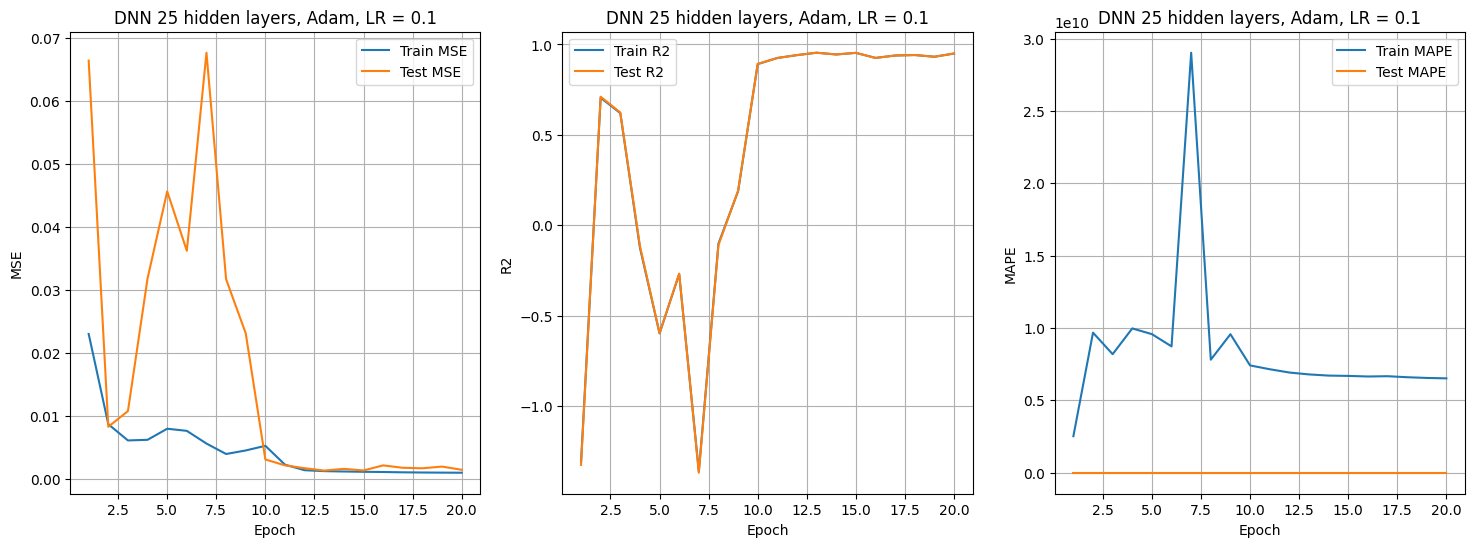

DNN 25 hidden layers, Adam, LR = 0.01
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, eps=

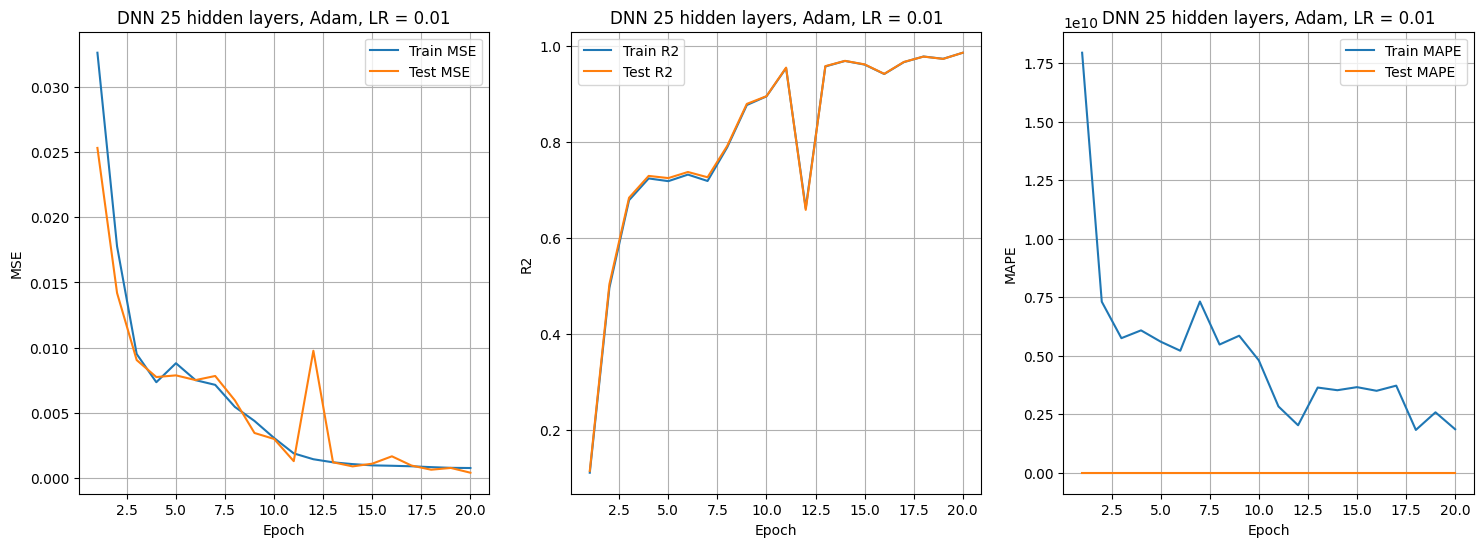

DNN 25 hidden layers, Adam, LR = 0.001
Device: cuda
DNN(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=10, out_features=10, bias=True)
    (16): BatchNorm1d(10, eps

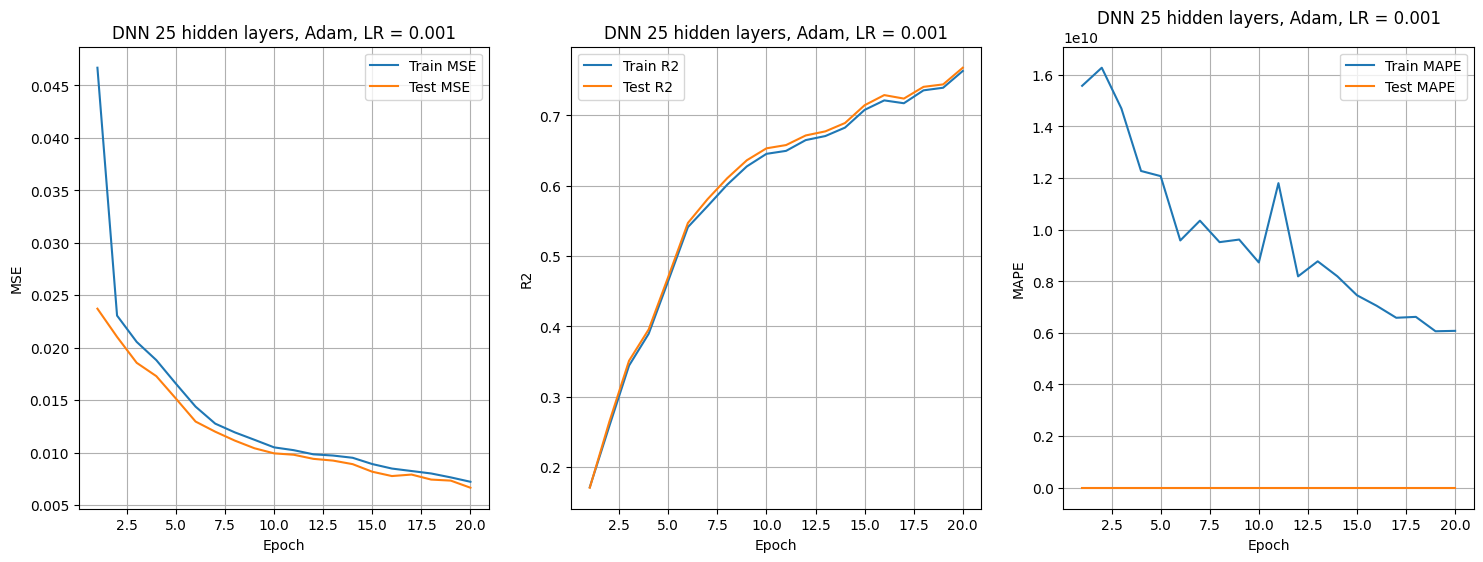

In [107]:
# Define parameters
num_layers_list = [1, 5, 25]
optimizers_list = ['SGD', 'RMSProp', 'Adam']
learning_rates_list = [0.1, 0.01, 0.001]
epochs = 20

mse_results = {}
r2_results = {}

# Plot learning curves for each combination
for num_layers in num_layers_list:
    for optimizer in optimizers_list:
        for learning_rate in learning_rates_list:
            print(f"DNN {num_layers} hidden layers, {optimizer}, LR = {learning_rate}")

            # Train model
            model, train_losses, test_losses, r2_train_list, r2_test_list, mape_train_list, mape_test_list = \
                train_model(X_train_torch, y_train_torch, X_test_torch, y_test_torch, optimizer, learning_rate,
                            num_layers, epochs)

            # Calculate mean MSE and R2 scores
            mse_mean = np.mean(test_losses)
            r2_mean = np.mean(r2_test_list)

            # Store results in dictionaries
            model_name = f"DNN_{num_layers}_{optimizer}_{learning_rate}"
            mse_results[model_name] = mse_mean
            r2_results[model_name] = r2_mean


            # Plot learning curves
            plt.figure(figsize=(18, 6))

            # MSE
            plt.subplot(1, 3, 1)
            plt.plot(range(1, epochs + 1), train_losses, label='Train MSE')
            plt.plot(range(1, epochs + 1), test_losses, label='Test MSE')
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.title(f'DNN {num_layers} hidden layers, {optimizer}, LR = {learning_rate}')
            plt.legend()
            plt.grid(True)

            # R2
            plt.subplot(1, 3, 2)
            plt.plot(range(1, epochs + 1), r2_train_list, label='Train R2')
            plt.plot(range(1, epochs + 1), r2_test_list, label='Test R2')
            plt.xlabel('Epoch')
            plt.ylabel('R2')
            plt.title(f'DNN {num_layers} hidden layers, {optimizer}, LR = {learning_rate}')
            plt.legend()
            plt.grid(True)

            # MAPE
            plt.subplot(1, 3, 3)
            plt.plot(range(1, epochs + 1), mape_train_list, label='Train MAPE')
            plt.plot(range(1, epochs + 1), mape_test_list, label='Test MAPE')
            plt.xlabel('Epoch')
            plt.ylabel('MAPE')
            plt.title(f'DNN {num_layers} hidden layers, {optimizer}, LR = {learning_rate}')
            plt.legend()
            plt.grid(True)

            plt.show()


#Compare DNN results with the baseline (LR)

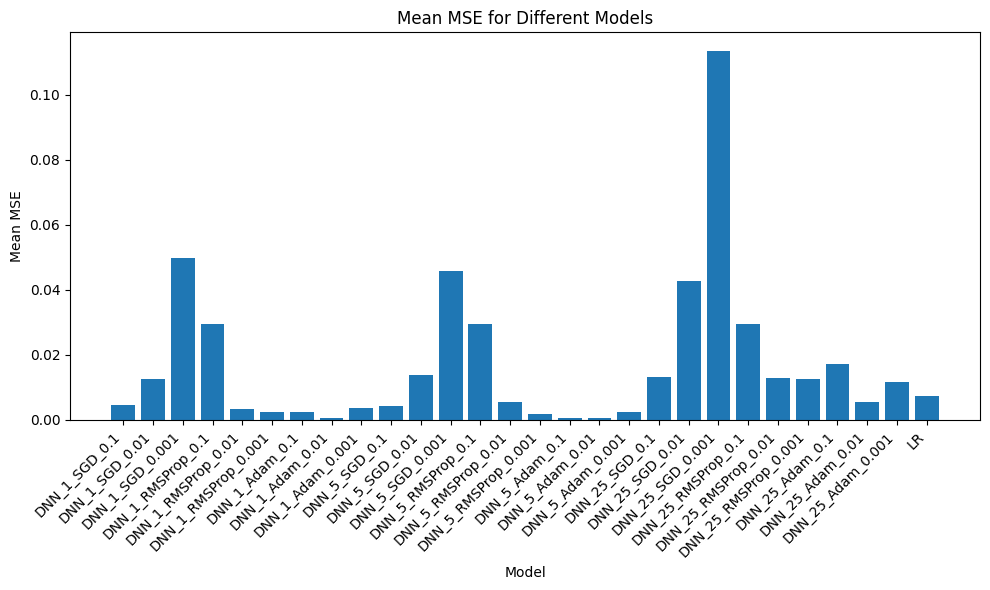

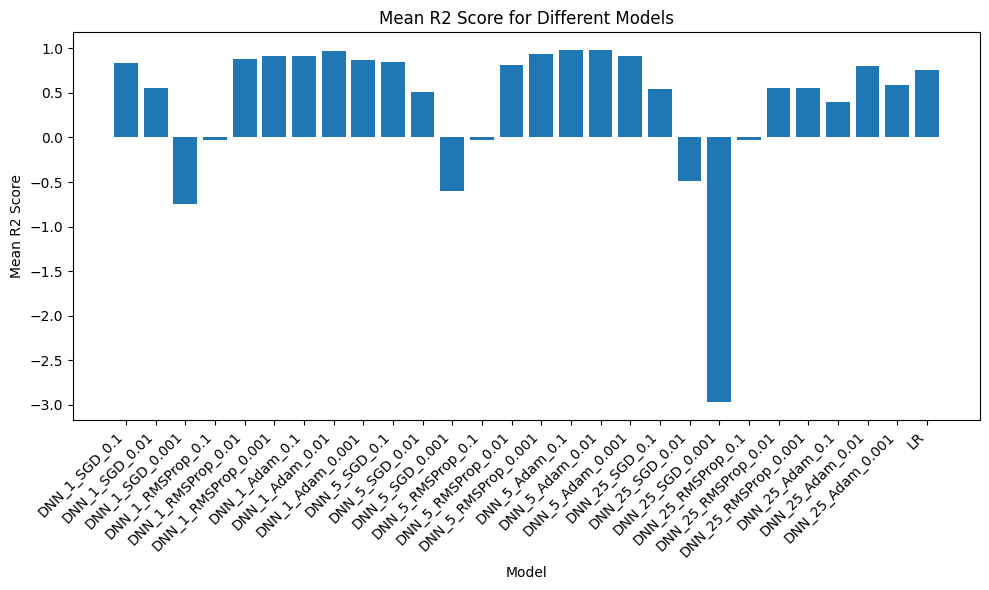

In [109]:
# Store results in dictionaries
model_name = f"LR"
mse_results[model_name] = float(lr_test_mean_mse)  # Convert to float
r2_results[model_name] = float(lr_r2_test_score)  # Convert to float

# Plot MSE results
plt.figure(figsize=(10, 6))
plt.bar(mse_results.keys(), mse_results.values())
plt.xlabel('Model')
plt.ylabel('Mean MSE')
plt.title('Mean MSE for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot R2 results
plt.figure(figsize=(10, 6))
plt.bar(r2_results.keys(), r2_results.values())
plt.xlabel('Model')
plt.ylabel('Mean R2 Score')
plt.title('Mean R2 Score for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Проведемо аналіз результатів за допомогою метрик MSE та R2.

Моделі з найменшою середньоквадратичною помилкою (MSE):

DNN_1_Adam_0.01
DNN_1_RMSProp_0.001
DNN_1_Adam_0.1
Моделі з одним шаром, що використовують оптимізатори Adam та RMSProp зі швидкістю навчання 0.01 та 0.1, показали найкращі результати в термінах MSE. Це свідчить про ефективність цих моделей у вирішенні завдань регресії.

Вплив оптимізатора:

- Моделі, які використовують оптимізатори **Adam та RMSProp**, показали кращі результати порівняно з SGD. Це може бути пов'язано з більшою здатністю цих оптимізаторів до адаптації градієнтів та здатністю знаходити більш ефективні шляхи до глобального мінімуму функції втрат.

Вплив швидкості навчання:

- Швидкості навчання **0.01 та 0.1** знову показали кращі результати порівняно з 0.001 для більшості моделей. Високі значення швидкості навчання допомагають моделі швидше збігатися, але при цьому можуть виникати проблеми з перенавчанням.

Вплив архітектури DNN:

- Знову моделі з одним шаром показали кращі результати в порівнянні з моделями з більшою кількістю шарів. Це свідчить про те, що прості моделі можуть бути більш ефективними в даному контексті.

Вплив розподілу даних:

- Моделі DNN знову показали кращі результати на нелінійних даних, адже саме такі дані генеруються за допомогою make_friedman1. Це підтверджує їх здатність адаптуватися до складних залежностей у даних і робити більш точні прогнози.

Модель лінійної регресії (LR) показала гірший результат порівняно з найкращою моделлю глибокого навчання (DNN_1_Adam_0.01) за метрикою MSE.
Модель лінійної регресії (LR) також показала гірший результат за метрикою R2 порівняно з найкращою DNN моделлю (DNN_5_Adam_0.1). Це підтверджує перевагу глибокого навчання у вирішенні завдань регресії, оскільки глибокі нейронні мережі можуть краще адаптуватися до складних залежностей у даних і забезпечувати точніші прогнози.